In [1]:
from datetime import datetime
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import interactive

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\transaction_data.csv")
df.head()

,UserId,TransactionId,TransactionTime,Transaction Date,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,02-02-2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,26-12-2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,15-02-2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,22-06-2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,10-09-2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


## EDA: Exploratory Data Analysis

In [3]:
# Checking null values across columns
df.isnull().sum(axis=0)

UserId                       0
TransactionId                0
TransactionTime              0
Transaction Date             0
ItemCode                     0
ItemDescription           2793
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [4]:
# Data Anomalies
df.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.410174e+05,6.159426e+06,6.582455e+05,2.868080e+01,9.630722e+00
std,1.423369e+05,1.476301e+05,4.526387e+05,6.640037e+02,2.346594e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026867e+06,4.609290e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166622e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


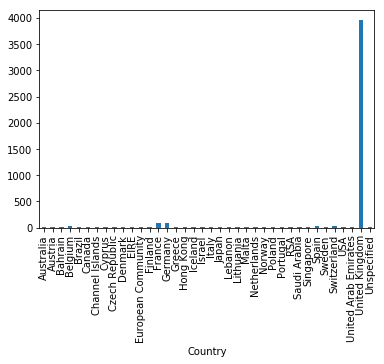

In [5]:
# Country-wise User Distribution
customer_country=df[['Country','UserId']].drop_duplicates()
customer_country.groupby(['Country'])['UserId'].aggregate('count').plot('bar')

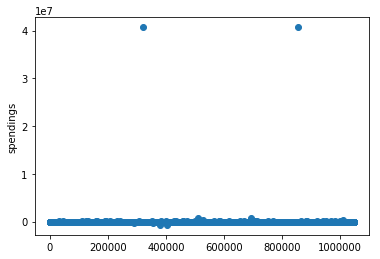

In [6]:
# Influencial observation (big spendings)
plt.scatter(df.index, df.NumberOfItemsPurchased * df.CostPerItem)
plt.ylabel("spendings")
interactive(True)
plt.show()

## Data Cleaning and feature Engineering

In [7]:
# Users per country
customer_country=df[['Country','UserId']].drop_duplicates()
customer_country.groupby(['Country'])['UserId'].aggregate('count').reset_index().sort_values('UserId', ascending=False)

,Country,UserId
36,United Kingdom,3951
14,Germany,95
13,France,88
31,Spain,31
3,Belgium,25
33,Switzerland,22
27,Portugal,20
19,Italy,15
12,Finland,12
1,Austria,11


In [8]:
''' More than 90% of the customers in the data are from the United Kingdom. There’s some research indicating that customer
    clusters vary by geography, so here I restricted the data to the United Kingdom only.'''

df = df.loc[df['Country'] == 'United Kingdom']

In [9]:
# null values in UserID are defined by -1.
df[(df['UserId'] == -1)]['UserId'].count()

258514

In [10]:
# dropping null userIDs because our analysis is based on customers, we will remove these missing values.
df_ = df[(df['UserId'] != -1)]
df_.head()

,UserId,TransactionId,TransactionTime,Transaction Date,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,02-02-2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,26-12-2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,22-06-2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
5,285957,6307136,Fri Jan 11 09:50:00 IST 2019,11-01-2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
6,345954,6162981,Fri Sep 28 10:51:00 IST 2018,28-09-2018,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom


In [11]:
# check minimum value for 'NumberOfItemsPurchased' and 'CostPerItem'.
df_.NumberOfItemsPurchased.min(), df_.CostPerItem.min()

(-242985, 0.0)

In [12]:
# drop rows with -ve 'NumberOfItemsPurchased' and 'CostPerItem' values as their -ve value makes no sense.
df_ = df_[(df_['NumberOfItemsPurchased'] > 0)]
df_ = df_[(df_['CostPerItem'] > 0)]
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685627 entries, 0 to 1048574
Data columns (total 9 columns):
UserId                    685627 non-null int64
TransactionId             685627 non-null int64
TransactionTime           685627 non-null object
Transaction Date          685627 non-null object
ItemCode                  685627 non-null int64
ItemDescription           685627 non-null object
NumberOfItemsPurchased    685627 non-null int64
CostPerItem               685627 non-null float64
Country                   685627 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 52.3+ MB


In [13]:
# Find Minimum and maximum of transaction date as recency is calculated for a point in time. 
df_['Transaction Date'].min(), df_['Transaction Date'].max()

('01-01-2019', '31-12-2018')

In [16]:
# Remove Transactions with date ahead of current Date (in future transaction) as few transactions are in 2028
now = datetime.now()
df_['Transaction Date'] = pd.to_datetime(df_['Transaction Date'])
df_ = df_[(df_['Transaction Date'] < now)]

In [17]:
# creation of a new atrribute 'spending' from 'items_purchased' and 'CostPerItem'.
df_['Total Spending'] = df_['NumberOfItemsPurchased'] * df_['CostPerItem']

In [18]:
def unique_counts(df):
    for column in df.columns:
        unique_count = df[column].nunique()
        print(column, ": ", unique_count)

unique_counts(df_)

UserId :  3915
TransactionId :  16579
TransactionTime :  15551
Transaction Date :  304
ItemCode :  3186
ItemDescription :  3843
NumberOfItemsPurchased :  291
CostPerItem :  398
Country :  1
Total Spending :  3073


## RMF Segmentation

In [19]:
# create rmfTable
ldt = df_['Transaction Date'].max() + dt.timedelta(1) #ldt: last transaction date
rfmTable = df_.groupby('UserId').agg({'Transaction Date': lambda x: (ldt - x.max()).days, 'TransactionId': lambda x: len(x), 'Total Spending': lambda x: x.sum()})
# change datatype of transaction_date column
rfmTable['Transaction Date'] = rfmTable['Transaction Date'].astype(int)
# rename columns
rfmTable.rename(columns={'Transaction Date': 'recency', 'TransactionId': 'frequency', 'Total Spending': 'monetary_value'}, inplace=True)

In [20]:
rfmTable.head()

,recency,frequency,monetary_value
UserId,,,
259266,698,2,641217.60
267687,288,199,33255.06
267708,1,8757,269095.41
267729,289,386,32986.23
269220,155,112,7494.72


In [21]:
# using combination of quantiles to define segements (segments can and can't be exclusive)
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [22]:
segmented_rfm = rfmTable

In [23]:
# functions to assign quantile values.
# for recency
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

# for frequency and spending
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [24]:
# applying functions
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
UserId,,,,,,
259266,698,2,641217.60,4,4,1
267687,288,199,33255.06,2,1,1
267708,1,8757,269095.41,1,1,1
267729,289,386,32986.23,2,1,1
269220,155,112,7494.72,1,2,2


In [25]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
UserId,,,,,,,
259266,698,2,641217.60,4,4,1,441
267687,288,199,33255.06,2,1,1,211
267708,1,8757,269095.41,1,1,1,111
267729,289,386,32986.23,2,1,1,211
269220,155,112,7494.72,1,2,2,122


### Saving Results

In [26]:
# Segmenting users into 'Best Customers', 'Loyal Cutomers', 'Big Spenders', 'Almost Lost Customers', 'Lost Customers', 'Lost Cheap Customers'
# based on their RMF Score
''' SEGMENT                      RMF SCORE
    Best Customers:                 111
    Loyal Cutomers:                 *1*
    Big Spenders:                   **1
    Almost Lost Customers:          311
    Lost Customers:                 411
    Lost Cheap Customers:           444
'''

' SEGMENT                      RMF SCORE\n    Best Customers:                 111\n    Loyal Cutomers:                 *1*\n    Big Spenders:                   **1\n    Almost Lost Customers:          311\n    Lost Customers:                 411\n    Lost Cheap Customers:           444\n'

In [27]:
BC = segmented_rfm[segmented_rfm['RFMScore']=='111'].reset_index().sort_values('monetary_value', ascending=False)['UserId']
LC = segmented_rfm[segmented_rfm['f_quartile']==1].reset_index().sort_values('monetary_value', ascending=False)['UserId']
BS = segmented_rfm[segmented_rfm['m_quartile']==1].reset_index().sort_values('monetary_value', ascending=False)['UserId']
ALC = segmented_rfm[segmented_rfm['RFMScore']=='311'].reset_index().sort_values('monetary_value', ascending=False)['UserId']
LC = segmented_rfm[segmented_rfm['RFMScore']=='411'].reset_index().sort_values('monetary_value', ascending=False)['UserId']
LCC = segmented_rfm[segmented_rfm['RFMScore']=='444'].reset_index().sort_values('monetary_value', ascending=False)['UserId']

In [28]:
data_dict = {'Best Customers': BC, 'Loyal Cutomers': LC, 'Big Spenders': BS, 'Almost Lost Customers': ALC, 'Lost Customers': LC, 'Lost Cheap Customers': LCC}
data_df = pd.DataFrame.from_dict(data_dict)
data_df.to_csv('Segmented_Customers.csv', index= False)